# Data Analysis
Table of Contents:
* [Importing Data](#one)
* [Data Manipulation](#two)
* [Analyzing Hashtags](#three)

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib
import seaborn as sns

## 1. Importing Data <a class="anchor" id="one"></a>
For each scenario, create data frame to organize which csv files belong to which scenario and test user <br>
In order for the following code blocks to run, change variable `prefix` below to the file path stored in your computer for this project

In [3]:
prefix = "/Users/carolinejung/tiktok-like-experiment/" # CHANGE ME!

In [8]:
sc1_files = pd.DataFrame(
    [{"run": 1, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-13-26_like_by_hashtag_data_all_videos.csv"},
     {"run": 1, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-13-26_like_by_hashtag_data_liked_videos.csv"},
     {"run": 1, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-13-25_like_by_control_data_all_videos.csv"},
     {"run": 1, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-13-25_like_by_control_data_liked_videos.csv"},

     {"run": 2, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-13-32_like_by_hashtag_data_all_videos.csv"},
     {"run": 2, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-13-32_like_by_hashtag_data_liked_videos.csv"},
     {"run": 2, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-13-31_like_by_control_data_all_videos.csv"},
     {"run": 2, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-13-31_like_by_control_data_liked_videos.csv"},

     {"run": 3, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-13-38_like_by_hashtag_data_all_videos.csv"},
     {"run": 3, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-13-38_like_by_hashtag_data_liked_videos.csv"},
     {"run": 3, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-13-37_like_by_control_data_all_videos.csv"},
     {"run": 3, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-13-37_like_by_control_data_liked_videos.csv"},

     {"run": 4, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-13-49_like_by_hashtag_data_all_videos.csv"},
     {"run": 4, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-13-49_like_by_hashtag_data_liked_videos.csv"},
     {"run": 4, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-13-48_like_by_control_data_all_videos.csv"},
     {"run": 4, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-13-48_like_by_control_data_liked_videos.csv"},

     {"run": 5, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-14-15_like_by_hashtag_data_all_videos.csv"},
     {"run": 5, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-14-15_like_by_hashtag_data_liked_videos.csv"},
     {"run": 5, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-14-14_like_by_control_data_all_videos.csv"},
     {"run": 5, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-14-14_like_by_control_data_liked_videos.csv"},

     {"run": 6, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-14-19_like_by_hashtag_data_all_videos.csv"},
     {"run": 6, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-14-19_like_by_hashtag_data_liked_videos.csv"},
     {"run": 6, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-14-18_like_by_control_data_all_videos.csv"},
     {"run": 6, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-14-18_like_by_control_data_liked_videos.csv"},

     {"run": 7, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-14-23_like_by_hashtag_data_all_videos.csv"},
     {"run": 7, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-14-23_like_by_hashtag_data_liked_videos.csv"},
     {"run": 7, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-14-22_like_by_control_data_all_videos.csv"},
     {"run": 7, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-14-22_like_by_control_data_liked_videos.csv"},

     {"run": 8, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-14-55_like_by_hashtag_data_all_videos.csv"},
     {"run": 8, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-14-55_like_by_hashtag_data_liked_videos.csv"},
     {"run": 8, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-14-54_like_by_control_data_all_videos.csv"},
     {"run": 8, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-14-54_like_by_control_data_liked_videos.csv"},

     {"run": 9, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-14-59_like_by_hashtag_data_all_videos.csv"},
     {"run": 9, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-14-59_like_by_hashtag_data_liked_videos.csv"},
     {"run": 9, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-14-58_like_by_control_data_all_videos.csv"},
     {"run": 9, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-14-58_like_by_control_data_liked_videos.csv"},

     {"run": 10, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-15-06_like_by_hashtag_data_all_videos.csv"},
     {"run": 10, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-15-06_like_by_hashtag_data_liked_videos.csv"},
     {"run": 10, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-15-06_like_by_control_data_all_videos.csv"},
     {"run": 10, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-15-06_like_by_control_data_liked_videos.csv"},

     {"run": 11, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-15-11_like_by_hashtag_data_all_videos.csv"},
     {"run": 11, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-15-11_like_by_hashtag_data_liked_videos.csv"},
     {"run": 11, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-15-11_like_by_control_data_all_videos.csv"},
     {"run": 11, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-15-11_like_by_control_data_liked_videos.csv"},

     {"run": 12, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-15-17_like_by_hashtag_data_all_videos.csv"},
     {"run": 12, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-15-17_like_by_hashtag_data_liked_videos.csv"},
     {"run": 12, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-15-16_like_by_control_data_all_videos.csv"},
     {"run": 12, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-15-16_like_by_control_data_liked_videos.csv"},

     {"run": 13, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-15-31_like_by_hashtag_data_all_videos.csv"},
     {"run": 13, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-15-31_like_by_hashtag_data_liked_videos.csv"},
     {"run": 13, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-15-31_like_by_control_data_all_videos.csv"},
     {"run": 13, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-15-31_like_by_control_data_liked_videos.csv"},

     {"run": 14, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-15-37_like_by_hashtag_data_all_videos.csv"},
     {"run": 14, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-13-15-37_like_by_hashtag_data_liked_videos.csv"},
     {"run": 14, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-15-37_like_by_control_data_all_videos.csv"},
     {"run": 14, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-13-15-37_like_by_control_data_liked_videos.csv"},

     {"run": 15, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-14-17-33_like_by_hashtag_data_all_videos.csv"},
     {"run": 15, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-14-17-33_like_by_hashtag_data_liked_videos.csv"},
     {"run": 15, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-14-17-32_like_by_control_data_all_videos.csv"},
     {"run": 15, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-14-17-32_like_by_control_data_liked_videos.csv"},

     {"run": 16, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-14-17-37_like_by_hashtag_data_all_videos.csv"},
     {"run": 16, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-14-17-37_like_by_hashtag_data_liked_videos.csv"},
     {"run": 16, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-14-17-36_like_by_control_data_all_videos.csv"},
     {"run": 16, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-14-17-36_like_by_control_data_liked_videos.csv"},

     {"run": 17, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-14-17-44_like_by_hashtag_data_all_videos.csv"},
     {"run": 17, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-14-17-44_like_by_hashtag_data_liked_videos.csv"},
     {"run": 17, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-14-17-44_like_by_control_data_all_videos.csv"},
     {"run": 17, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-14-17-44_like_by_control_data_liked_videos.csv"},

     {"run": 18, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-14-17-58_like_by_hashtag_data_all_videos.csv"},
     {"run": 18, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-14-17-58_like_by_hashtag_data_liked_videos.csv"},
     {"run": 18, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-14-17-57_like_by_control_data_all_videos.csv"},
     {"run": 18, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-14-17-57_like_by_control_data_liked_videos.csv"},

     {"run": 19, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-14-18-01_like_by_hashtag_data_all_videos.csv"},
     {"run": 19, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-14-18-01_like_by_hashtag_data_liked_videos.csv"},
     {"run": 19, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-14-18-00_like_by_control_data_all_videos.csv"},
     {"run": 19, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-14-18-00_like_by_control_data_liked_videos.csv"},

     {"run": 20, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-14-18-05_like_by_hashtag_data_all_videos.csv"},
     {"run": 20, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-14-18-05_like_by_hashtag_data_liked_videos.csv"},
     {"run": 20, "user": "active", "videos": "all", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-14-18-04_like_by_control_data_all_videos.csv"},
     {"run": 20, "user": "active", "videos": "liked", "path": prefix+"data/1_Sec02Gr2Sc1Activ_SL_02-14-18-04_like_by_control_data_liked_videos.csv"},
    ])

In [9]:
sc2_files = pd.DataFrame(
    [{"run": 1, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-12-19-31_like_by_hashtag_data_all_videos.csv"},
     {"run": 1, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-12-19-31_like_by_hashtag_data_liked_videos.csv"},
     {"run": 1, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-12-19-30_like_by_control_data_all_videos.csv"},
     {"run": 1, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-12-19-30_like_by_control_data_liked_videos.csv"},

     {"run": 2, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-12-19-40_like_by_hashtag_data_all_videos.csv"},
     {"run": 2, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-12-19-40_like_by_hashtag_data_liked_videos.csv"},
     {"run": 2, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-12-19-39_like_by_control_data_all_videos.csv"},
     {"run": 2, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-12-19-39_like_by_control_data_liked_videos.csv"},

     {"run": 3, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-31_like_by_hashtag_data_all_videos.csv"},
     {"run": 3, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-31_like_by_hashtag_data_liked_videos.csv"},
     {"run": 3, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-30_like_by_control_data_all_videos.csv"},
     {"run": 3, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-30_like_by_control_data_liked_videos.csv"},

     {"run": 4, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-37_like_by_hashtag_data_all_videos.csv"},
     {"run": 4, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-37_like_by_hashtag_data_liked_videos.csv"},
     {"run": 4, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-36_like_by_control_data_all_videos.csv"},
     {"run": 4, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-36_like_by_control_data_liked_videos.csv"},

     {"run": 5, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-53_like_by_hashtag_data_all_videos.csv"},
     {"run": 5, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-53_like_by_hashtag_data_liked_videos.csv"},
     {"run": 5, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-52_like_by_control_data_all_videos.csv"},
     {"run": 5, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-52_like_by_control_data_liked_videos.csv"},

     {"run": 6, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-00-59_like_by_hashtag_data_all_videos.csv"},
     {"run": 6, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-00-59_like_by_hashtag_data_liked_videos.csv"},
     {"run": 6, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-00-58_like_by_control_data_all_videos.csv"},
     {"run": 6, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-00-58_like_by_control_data_liked_videos.csv"},

     {"run": 7, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-01-03_like_by_hashtag_data_all_videos.csv"},
     {"run": 7, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-01-03_like_by_hashtag_data_liked_videos.csv"},
     {"run": 7, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-01-02_like_by_control_data_all_videos.csv"},
     {"run": 7, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-01-02_like_by_control_data_liked_videos.csv"},

     {"run": 8, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-01-16_like_by_hashtag_data_all_videos.csv"},
     {"run": 8, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-01-16_like_by_hashtag_data_liked_videos.csv"},
     {"run": 8, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-01-16_like_by_control_data_all_videos.csv"},
     {"run": 8, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-01-16_like_by_control_data_liked_videos.csv"},

     {"run": 9, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-01-22_like_by_hashtag_data_all_videos.csv"},
     {"run": 9, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-01-22_like_by_hashtag_data_liked_videos.csv"},
     {"run": 9, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-01-21_like_by_control_data_all_videos.csv"},
     {"run": 9, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-01-21_like_by_control_data_liked_videos.csv"},

     {"run": 10, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-12-23_like_by_hashtag_data_all_videos.csv"},
     {"run": 10, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-12-23_like_by_hashtag_data_liked_videos.csv"},
     {"run": 10, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-12-23_like_by_control_data_all_videos.csv"},
     {"run": 10, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-12-23_like_by_control_data_liked_videos.csv"},

     {"run": 11, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-12-34_like_by_hashtag_data_all_videos.csv"},
     {"run": 11, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-12-34_like_by_hashtag_data_liked_videos.csv"},
     {"run": 11, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-12-33_like_by_control_data_all_videos.csv"},
     {"run": 11, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-12-33_like_by_control_data_liked_videos.csv"},

     {"run": 12, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-12-48_like_by_hashtag_data_all_videos.csv"},
     {"run": 12, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-12-48_like_by_hashtag_data_liked_videos.csv"},
     {"run": 12, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-12-49_like_by_control_data_all_videos.csv"},
     {"run": 12, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-12-49_like_by_control_data_liked_videos.csv"},

     {"run": 13, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-19_like_by_hashtag_data_all_videos.csv"},
     {"run": 13, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-19_like_by_hashtag_data_liked_videos.csv"},
     {"run": 13, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-18_like_by_control_data_all_videos.csv"},
     {"run": 13, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-18_like_by_control_data_liked_videos.csv"},

     {"run": 14, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-36_like_by_hashtag_data_all_videos.csv"},
     {"run": 14, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-36_like_by_hashtag_data_liked_videos.csv"},
     {"run": 14, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-35_like_by_control_data_all_videos.csv"},
     {"run": 14, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-35_like_by_control_data_liked_videos.csv"},

     {"run": 15, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-40_like_by_hashtag_data_all_videos.csv"},
     {"run": 15, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-40_like_by_hashtag_data_liked_videos.csv"},
     {"run": 15, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-39_like_by_control_data_all_videos.csv"},
     {"run": 15, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-39_like_by_control_data_liked_videos.csv"},

     {"run": 16, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-45_like_by_hashtag_data_all_videos.csv"},
     {"run": 16, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-45_like_by_hashtag_data_liked_videos.csv"},
     {"run": 16, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-44_like_by_control_data_all_videos.csv"},
     {"run": 16, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-44_like_by_control_data_liked_videos.csv"},

     {"run": 17, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-52_like_by_hashtag_data_all_videos.csv"},
     {"run": 17, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-52_like_by_hashtag_data_liked_videos.csv"},
     {"run": 17, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-51_like_by_control_data_all_videos.csv"},
     {"run": 17, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-51_like_by_control_data_liked_videos.csv"},

     {"run": 18, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-54_like_by_hashtag_data_all_videos.csv"},
     {"run": 18, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-54_like_by_hashtag_data_liked_videos.csv"},
     {"run": 18, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-54_like_by_control_data_all_videos.csv"},
     {"run": 18, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-54_like_by_control_data_liked_videos.csv"},

     {"run": 19, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-58_like_by_hashtag_data_all_videos.csv"},
     {"run": 19, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-13-58_like_by_hashtag_data_liked_videos.csv"},
     {"run": 19, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-58_like_by_control_data_all_videos.csv"},
     {"run": 19, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-13-58_like_by_control_data_liked_videos.csv"},

     {"run": 20, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-14-02_like_by_hashtag_data_all_videos.csv"},
     {"run": 20, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-14-14-02_like_by_hashtag_data_liked_videos.csv"},
     {"run": 20, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-14-02_like_by_control_data_all_videos.csv"},
     {"run": 20, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-14-14-02_like_by_control_data_liked_videos.csv"}
    ])

In [10]:
sc3_files = pd.DataFrame(
    [{"run": 1, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-12-19-40_like_by_hashtag_data_all_videos.csv"},
     {"run": 1, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-12-19-40_like_by_hashtag_data_liked_videos.csv"},
     {"run": 1, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-12-19-39_like_by_control_data_all_videos.csv"},
     {"run": 1, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-12-19-39_like_by_control_data_liked_videos.csv"},

     {"run": 2, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-13-13-35_like_by_hashtag_data_all_videos.csv"},
     {"run": 2, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-13-13-35_like_by_hashtag_data_liked_videos.csv"},
     {"run": 2, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-13-13-34_like_by_control_data_all_videos.csv"},
     {"run": 2, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-13-13-34_like_by_control_data_liked_videos.csv"},

     {"run": 3, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-13-13-49_like_by_hashtag_data_all_videos.csv"},
     {"run": 3, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-13-13-49_like_by_hashtag_data_liked_videos.csv"},
     {"run": 3, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-13-13-49_like_by_control_data_all_videos.csv"},
     {"run": 3, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-13-13-49_like_by_control_data_liked_videos.csv"},

     {"run": 4, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-18-51_like_by_hashtag_data_all_videos.csv"},
     {"run": 4, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-18-51_like_by_hashtag_data_liked_videos.csv"},
     {"run": 4, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-18-50_like_by_control_data_all_videos.csv"},
     {"run": 4, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-18-50_like_by_control_data_liked_videos.csv"},

     {"run": 5, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-19-00_like_by_hashtag_data_all_videos.csv"},
     {"run": 5, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-19-00_like_by_hashtag_data_liked_videos.csv"},
     {"run": 5, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-19-00_like_by_control_data_all_videos.csv"},
     {"run": 5, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-19-00_like_by_control_data_liked_videos.csv"},

     {"run": 6, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-19-05_like_by_hashtag_data_all_videos.csv"},
     {"run": 6, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-19-05_like_by_hashtag_data_liked_videos.csv"},
     {"run": 6, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-19-04_like_by_control_data_all_videos.csv"},
     {"run": 6, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-19-04_like_by_control_data_liked_videos.csv"},

     {"run": 7, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-19-14_like_by_hashtag_data_all_videos.csv"},
     {"run": 7, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-19-14_like_by_hashtag_data_liked_videos.csv"},
     {"run": 7, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-19-13_like_by_control_data_all_videos.csv"},
     {"run": 7, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-19-13_like_by_control_data_liked_videos.csv"},

     {"run": 8, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-19-17_like_by_hashtag_data_all_videos.csv"},
     {"run": 8, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-19-17_like_by_hashtag_data_liked_videos.csv"},
     {"run": 8, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-19-16_like_by_control_data_all_videos.csv"},
     {"run": 8, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-19-16_like_by_control_data_liked_videos.csv"},

     {"run": 9, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-19-21_like_by_hashtag_data_all_videos.csv"},
     {"run": 9, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-19-21_like_by_hashtag_data_liked_videos.csv"},
     {"run": 9, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-19-21_like_by_control_data_all_videos.csv"},
     {"run": 9, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-19-21_like_by_control_data_liked_videos.csv"},

     {"run": 10, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-19-25_like_by_hashtag_data_all_videos.csv"},
     {"run": 10, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-19-25_like_by_hashtag_data_liked_videos.csv"},
     {"run": 10, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-19-24_like_by_control_data_all_videos.csv"},
     {"run": 10, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-19-24_like_by_control_data_liked_videos.csv"},

     {"run": 11, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-20-40_like_by_hashtag_data_all_videos.csv"},
     {"run": 11, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-20-40_like_by_hashtag_data_liked_videos.csv"},
     {"run": 11, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-20-39_like_by_control_data_all_videos.csv"},
     {"run": 11, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-20-39_like_by_control_data_liked_videos.csv"},

     {"run": 12, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-20-51_like_by_hashtag_data_all_videos.csv"},
     {"run": 12, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-20-51_like_by_hashtag_data_liked_videos.csv"},
     {"run": 12, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-20-50_like_by_control_data_all_videos.csv"},
     {"run": 12, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-20-50_like_by_control_data_liked_videos.csv"},

     {"run": 13, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-20-55_like_by_hashtag_data_all_videos.csv"},
     {"run": 13, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-20-55_like_by_hashtag_data_liked_videos.csv"},
     {"run": 13, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-20-54_like_by_control_data_all_videos.csv"},
     {"run": 13, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-20-54_like_by_control_data_liked_videos.csv"},

     {"run": 14, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-21-02_like_by_hashtag_data_all_videos.csv"},
     {"run": 14, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-21-02_like_by_hashtag_data_liked_videos.csv"},
     {"run": 14, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-21-01_like_by_control_data_all_videos.csv"},
     {"run": 14, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-21-01_like_by_control_data_liked_videos.csv"},

     {"run": 15, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-21-28_like_by_hashtag_data_all_videos.csv"},
     {"run": 15, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-21-28_like_by_hashtag_data_liked_videos.csv"},
     {"run": 15, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-21-27_like_by_control_data_all_videos.csv"},
     {"run": 15, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-21-27_like_by_control_data_liked_videos.csv"},

     {"run": 16, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-23-44_like_by_hashtag_data_all_videos.csv"},
     {"run": 16, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-23-44_like_by_hashtag_data_liked_videos.csv"},
     {"run": 16, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-23-43_like_by_control_data_all_videos.csv"},
     {"run": 16, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-23-43_like_by_control_data_liked_videos.csv"},

     {"run": 17, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-23-51_like_by_hashtag_data_all_videos.csv"},
     {"run": 17, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-23-51_like_by_hashtag_data_liked_videos.csv"},
     {"run": 17, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-23-50_like_by_control_data_all_videos.csv"},
     {"run": 17, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-23-50_like_by_control_data_liked_videos.csv"},

     {"run": 18, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-23-56_like_by_hashtag_data_all_videos.csv"},
     {"run": 18, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-14-23-56_like_by_hashtag_data_liked_videos.csv"},
     {"run": 18, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-23-55_like_by_control_data_all_videos.csv"},
     {"run": 18, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-14-23-55_like_by_control_data_liked_videos.csv"},

     {"run": 19, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-15-00-01_like_by_hashtag_data_all_videos.csv"},
     {"run": 19, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-15-00-01_like_by_hashtag_data_liked_videos.csv"},
     {"run": 19, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-15-00-00_like_by_control_data_all_videos.csv"},
     {"run": 19, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-15-00-00_like_by_control_data_liked_videos.csv"},

     {"run": 20, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-15-01-21_like_by_hashtag_data_all_videos.csv"},
     {"run": 20, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc3Cntrl_AL_02-15-01-21_like_by_hashtag_data_liked_videos.csv"},
     {"run": 20, "user": "active", "videos": "all", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-15-01-20_like_by_control_data_all_videos.csv"},
     {"run": 20, "user": "active", "videos": "liked", "path": prefix+"data/3_Sec02Gr2Sc3Activ_AL_02-15-01-20_like_by_control_data_liked_videos.csv"},
    ])

In [14]:
sc4_files = pd.DataFrame(
    [{"run": 1, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-14-23-58_like_by_hashtag_data_all_videos.csv"},
     {"run": 1, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-14-23-58_like_by_hashtag_data_liked_videos.csv"},
     {"run": 1, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-14-23-58_like_by_control_data_all_videos.csv"},
     {"run": 1, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-14-23-58_like_by_control_data_liked_videos.csv"},

     {"run": 2, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-02_like_by_hashtag_data_all_videos.csv"},
     {"run": 2, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-02_like_by_hashtag_data_liked_videos.csv"},
     {"run": 2, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-02_like_by_control_data_all_videos.csv"},
     {"run": 2, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-02_like_by_control_data_liked_videos.csv"},

     {"run": 3, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-05_like_by_hashtag_data_all_videos.csv"},
     {"run": 3, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-05_like_by_hashtag_data_liked_videos.csv"},
     {"run": 3, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-05_like_by_control_data_all_videos.csv"},
     {"run": 3, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-05_like_by_control_data_liked_videos.csv"},

     {"run": 4, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-08_like_by_hashtag_data_all_videos.csv"},
     {"run": 4, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-08_like_by_hashtag_data_liked_videos.csv"},
     {"run": 4, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-08_like_by_control_data_all_videos.csv"},
     {"run": 4, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-08_like_by_control_data_liked_videos.csv"},

     {"run": 5, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-11_like_by_hashtag_data_all_videos.csv"},
     {"run": 5, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-11_like_by_hashtag_data_liked_videos.csv"},
     {"run": 5, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-11_like_by_control_data_all_videos.csv"},
     {"run": 5, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-11_like_by_control_data_liked_videos.csv"},

     {"run": 6, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-15_like_by_hashtag_data_all_videos.csv"},
     {"run": 6, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-15_like_by_hashtag_data_liked_videos.csv"},
     {"run": 6, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-15_like_by_control_data_all_videos.csv"},
     {"run": 6, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-15_like_by_control_data_liked_videos.csv"},

     {"run": 7, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-19_like_by_hashtag_data_all_videos.csv"},
     {"run": 7, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-19_like_by_hashtag_data_liked_videos.csv"},
     {"run": 7, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-18_like_by_control_data_all_videos.csv"},
     {"run": 7, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-18_like_by_control_data_liked_videos.csv"},

     {"run": 8, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-22_like_by_hashtag_data_all_videos.csv"},
     {"run": 8, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-22_like_by_hashtag_data_liked_videos.csv"},
     {"run": 8, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-21_like_by_control_data_all_videos.csv"},
     {"run": 8, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-21_like_by_control_data_liked_videos.csv"},

     {"run": 9, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-25_like_by_hashtag_data_all_videos.csv"},
     {"run": 9, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-25_like_by_hashtag_data_liked_videos.csv"},
     {"run": 9, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-24_like_by_control_data_all_videos.csv"},
     {"run": 9, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-24_like_by_control_data_liked_videos.csv"},

     {"run": 10, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-29_like_by_hashtag_data_all_videos.csv"},
     {"run": 10, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-29_like_by_hashtag_data_liked_videos.csv"},
     {"run": 10, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-28_like_by_control_data_all_videos.csv"},
     {"run": 10, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-28_like_by_control_data_liked_videos.csv"},

     {"run": 11, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-32_like_by_hashtag_data_all_videos.csv"},
     {"run": 11, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-32_like_by_hashtag_data_liked_videos.csv"},
     {"run": 11, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-31_like_by_control_data_all_videos.csv"},
     {"run": 11, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-31_like_by_control_data_liked_videos.csv"},

     {"run": 12, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-35_like_by_hashtag_data_all_videos.csv"},
     {"run": 12, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-35_like_by_hashtag_data_liked_videos.csv"},
     {"run": 12, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-35_like_by_control_data_all_videos.csv"},
     {"run": 12, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-35_like_by_control_data_liked_videos.csv"},

     {"run": 13, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-39_like_by_hashtag_data_all_videos.csv"},
     {"run": 13, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-39_like_by_hashtag_data_liked_videos.csv"},
     {"run": 13, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-38_like_by_control_data_all_videos.csv"},
     {"run": 13, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-38_like_by_control_data_liked_videos.csv"},

     {"run": 14, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-42_like_by_hashtag_data_all_videos.csv"},
     {"run": 14, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-42_like_by_hashtag_data_liked_videos.csv"},
     {"run": 14, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-42_like_by_control_data_all_videos.csv"},
     {"run": 14, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-42_like_by_control_data_liked_videos.csv"},

     {"run": 15, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-45_like_by_hashtag_data_all_videos.csv"},
     {"run": 15, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-45_like_by_hashtag_data_liked_videos.csv"},
     {"run": 15, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-45_like_by_control_data_all_videos.csv"},
     {"run": 15, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-45_like_by_control_data_liked_videos.csv"},

     {"run": 16, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-49_like_by_hashtag_data_all_videos.csv"},
     {"run": 16, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-49_like_by_hashtag_data_liked_videos.csv"},
     {"run": 16, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-48_like_by_control_data_all_videos.csv"},
     {"run": 16, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-48_like_by_control_data_liked_videos.csv"},

     {"run": 17, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-52_like_by_hashtag_data_all_videos.csv"},
     {"run": 17, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-52_like_by_hashtag_data_liked_videos.csv"},
     {"run": 17, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-52_like_by_control_data_all_videos.csv"},
     {"run": 17, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-52_like_by_control_data_liked_videos.csv"},

     {"run": 18, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-56_like_by_hashtag_data_all_videos.csv"},
     {"run": 18, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-56_like_by_hashtag_data_liked_videos.csv"},
     {"run": 18, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-55_like_by_control_data_all_videos.csv"},
     {"run": 18, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-55_like_by_control_data_liked_videos.csv"},

     {"run": 19, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-59_like_by_hashtag_data_all_videos.csv"},
     {"run": 19, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-00-59_like_by_hashtag_data_liked_videos.csv"},
     {"run": 19, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-59_like_by_control_data_all_videos.csv"},
     {"run": 19, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-00-59_like_by_control_data_liked_videos.csv"},

     {"run": 20, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-01-03_like_by_hashtag_data_all_videos.csv"},
     {"run": 20, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc4Cntrl_SL_02-15-01-03_like_by_hashtag_data_liked_videos.csv"},
     {"run": 20, "user": "active", "videos": "all", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-01-03_like_by_control_data_all_videos.csv"},
     {"run": 20, "user": "active", "videos": "liked", "path": prefix+"data/4_Sec02Gr2Sc4Activ_SL_02-15-01-03_like_by_control_data_liked_videos.csv"},
    ])

In [11]:
sc5_files = pd.DataFrame(
    [{"run": 1, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-12-19-31_like_by_hashtag_data_all_videos.csv"},
     {"run": 1, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-12-19-31_like_by_hashtag_data_liked_videos.csv"},
     {"run": 1, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-12-19-30_like_by_control_data_all_videos.csv"},
     {"run": 1, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-12-19-30_like_by_control_data_liked_videos.csv"},

     {"run": 2, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-13-25_like_by_hashtag_data_all_videos.csv"},
     {"run": 2, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-13-25_like_by_hashtag_data_liked_videos.csv"},
     {"run": 2, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-13-23_like_by_control_data_all_videos.csv"},
     {"run": 2, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-13-23_like_by_control_data_liked_videos.csv"},

     {"run": 3, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-37_like_by_hashtag_data_all_videos.csv"},
     {"run": 3, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc2Cntrl_CJ_02-13-13-37_like_by_hashtag_data_liked_videos.csv"},
     {"run": 3, "user": "active", "videos": "all", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-36_like_by_control_data_all_videos.csv"},
     {"run": 3, "user": "active", "videos": "liked", "path": prefix+"data/2_Sec02Gr2Sc2Activ_CJ_02-13-13-36_like_by_control_data_liked_videos.csv"},

     {"run": 4, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-13-45_like_by_hashtag_data_all_videos.csv"},
     {"run": 4, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-13-45_like_by_hashtag_data_liked_videos.csv"},
     {"run": 4, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-13-38_like_by_control_data_all_videos.csv"},
     {"run": 4, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-13-38_like_by_control_data_liked_videos.csv"},

     {"run": 5, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-13-56_like_by_hashtag_data_all_videos.csv"},
     {"run": 5, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-13-56_like_by_hashtag_data_liked_videos.csv"},
     {"run": 5, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-13-55_like_by_control_data_all_videos.csv"},
     {"run": 5, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-13-55_like_by_control_data_liked_videos.csv"},

     {"run": 6, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-37_like_by_hashtag_data_all_videos.csv"},
     {"run": 6, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-37_like_by_hashtag_data_liked_videos.csv"},
     {"run": 6, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-37_like_by_control_data_all_videos.csv"},
     {"run": 6, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-37_like_by_control_data_liked_videos.csv"},

     {"run": 7, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-43_like_by_hashtag_data_all_videos.csv"},
     {"run": 7, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-43_like_by_hashtag_data_liked_videos.csv"},
     {"run": 7, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-43_like_by_control_data_all_videos.csv"},
     {"run": 7, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-43_like_by_control_data_liked_videos.csv"},

     {"run": 8, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-50_like_by_hashtag_data_all_videos.csv"},
     {"run": 8, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-50_like_by_hashtag_data_liked_videos.csv"},
     {"run": 8, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-48_like_by_control_data_all_videos.csv"},
     {"run": 8, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-48_like_by_control_data_liked_videos.csv"},

     {"run": 9, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-54_like_by_hashtag_data_all_videos.csv"},
     {"run": 9, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-54_like_by_hashtag_data_liked_videos.csv"},
     {"run": 9, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-53_like_by_control_data_all_videos.csv"},
     {"run": 9, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-53_like_by_control_data_liked_videos.csv"},

     {"run": 10, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-58_like_by_hashtag_data_all_videos.csv"},
     {"run": 10, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-14-58_like_by_hashtag_data_liked_videos.csv"},
     {"run": 10, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-57_like_by_control_data_all_videos.csv"},
     {"run": 10, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-14-57_like_by_control_data_liked_videos.csv"},

     {"run": 11, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-22_like_by_hashtag_data_all_videos.csv"},
     {"run": 11, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-22_like_by_hashtag_data_liked_videos.csv"},
     {"run": 11, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-21_like_by_control_data_all_videos.csv"},
     {"run": 11, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-21_like_by_control_data_liked_videos.csv"},

     {"run": 12, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-30_like_by_hashtag_data_all_videos.csv"},
     {"run": 12, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-30_like_by_hashtag_data_liked_videos.csv"},
     {"run": 12, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-29_like_by_control_data_all_videos.csv"},
     {"run": 12, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-29_like_by_control_data_liked_videos.csv"},

     {"run": 13, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-37_like_by_hashtag_data_all_videos.csv"},
     {"run": 13, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-37_like_by_hashtag_data_liked_videos.csv"},
     {"run": 13, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-36_like_by_control_data_all_videos.csv"},
     {"run": 13, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-36_like_by_control_data_liked_videos.csv"},

     {"run": 14, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-51_like_by_hashtag_data_all_videos.csv"},
     {"run": 14, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-15-51_like_by_hashtag_data_liked_videos.csv"},
     {"run": 14, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-50_like_by_control_data_all_videos.csv"},
     {"run": 14, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-15-50_like_by_control_data_liked_videos.csv"},

     {"run": 15, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-16-03_like_by_hashtag_data_all_videos.csv"},
     {"run": 15, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-16-03_like_by_hashtag_data_liked_videos.csv"},
     {"run": 15, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-16-01_like_by_control_data_all_videos.csv"},
     {"run": 15, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-16-01_like_by_control_data_liked_videos.csv"},

     {"run": 16, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-16-15_like_by_hashtag_data_all_videos.csv"},
     {"run": 16, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-16-15_like_by_hashtag_data_liked_videos.csv"},
     {"run": 16, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-16-14_like_by_control_data_all_videos.csv"},
     {"run": 16, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-16-14_like_by_control_data_liked_videos.csv"},

     {"run": 17, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-16-40_like_by_hashtag_data_all_videos.csv"},
     {"run": 17, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-16-40_like_by_hashtag_data_liked_videos.csv"},
     {"run": 17, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-16-39_like_by_control_data_all_videos.csv"},
     {"run": 17, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-16-39_like_by_control_data_liked_videos.csv"},

     {"run": 18, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-17-07_like_by_hashtag_data_all_videos.csv"},
     {"run": 18, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-17-07_like_by_hashtag_data_liked_videos.csv"},
     {"run": 18, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-17-07_like_by_control_data_all_videos.csv"},
     {"run": 18, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-17-07_like_by_control_data_liked_videos.csv"},

     {"run": 19, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-17-56_like_by_hashtag_data_all_videos.csv"},
     {"run": 19, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-17-56_like_by_hashtag_data_liked_videos.csv"},
     {"run": 19, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-17-55_like_by_control_data_all_videos.csv"},
     {"run": 19, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-17-55_like_by_control_data_liked_videos.csv"},

     {"run": 20, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-18-26_like_by_hashtag_data_all_videos.csv"},
     {"run": 20, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_JL_02-13-18-26_like_by_hashtag_data_liked_videos.csv"},
     {"run": 20, "user": "active", "videos": "all", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-18-26_like_by_control_data_all_videos.csv"},
     {"run": 20, "user": "active", "videos": "liked", "path": prefix+"data/5_Sec02Gr2Sc5Activ_JL_02-13-18-26_like_by_control_data_liked_videos.csv"}                 
    ])

In [101]:
sc6_files = pd.DataFrame(
    [{"run": 1, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_MM_02-12-19-33_like_by_hashtag_data_all_videos.csv"},
     {"run": 1, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_MM_02-12-19-33_like_by_hashtag_data_liked_videos.csv"},
     {"run": 1, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-12-19-30_like_by_control_data_all_videos.csv"},
     {"run": 1, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-12-19-30_like_by_control_data_liked_videos.csv"},

     {"run": 2, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_MM_02-12-19-39_like_by_hashtag_data_all_videos.csv"},
     {"run": 2, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_MM_02-12-19-39_like_by_hashtag_data_liked_videos.csv"},
     {"run": 2, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-12-19-39_like_by_control_data_all_videos.csv"},
     {"run": 2, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-12-19-39_like_by_control_data_liked_videos.csv"},

     {"run": 3, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-27_like_by_hashtag_data_all_videos.csv"},
     {"run": 3, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-21_like_by_hashtag_data_liked_videos.csv"},
     {"run": 3, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-26_like_by_control_data_all_videos.csv"},
     {"run": 3, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-26_like_by_control_data_liked_videos.csv"},

     {"run": 4, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-30_like_by_hashtag_data_all_videos.csv"},
     {"run": 4, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-30_like_by_hashtag_data_liked_videos.csv"},
     {"run": 4, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-30_like_by_control_data_all_videos.csv"},
     {"run": 4, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-30_like_by_control_data_liked_videos.csv"},
     
     {"run": 5, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-34_like_by_hashtag_data_all_videos.csv"},
     {"run": 5, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-34_like_by_hashtag_data_liked_videos.csv"},
     {"run": 5, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-34_like_by_control_data_all_videos.csv"},
     {"run": 5, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-34_like_by_control_data_liked_videos.csv"},

     {"run": 6, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-43_like_by_hashtag_data_all_videos.csv"},
     {"run": 6, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-43_like_by_hashtag_data_liked_videos.csv"},
     {"run": 6, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-42_like_by_control_data_all_videos.csv"},
     {"run": 6, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-42_like_by_control_data_liked_videos.csv"},

     {"run": 7, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-47_like_by_hashtag_data_all_videos.csv"},
     {"run": 7, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-47_like_by_hashtag_data_liked_videos.csv"},
     {"run": 7, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-47_like_by_control_data_all_videos.csv"},
     {"run": 7, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-47_like_by_control_data_liked_videos.csv"},

     {"run": 8, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-51_like_by_hashtag_data_all_videos.csv"},
     {"run": 8, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-51_like_by_hashtag_data_liked_videos.csv"},
     {"run": 8, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-51_like_by_control_data_all_videos.csv"},
     {"run": 8, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-51_like_by_control_data_liked_videos.csv"},

     {"run": 9, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-55_like_by_hashtag_data_all_videos.csv"},
     {"run": 9, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-13-13-55_like_by_hashtag_data_liked_videos.csv"},
     {"run": 9, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-54_like_by_control_data_all_videos.csv"},
     {"run": 9, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-13-13-54_like_by_control_data_liked_videos.csv"},

     {"run": 10, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-17-42_like_by_hashtag_data_all_videos.csv"},
     {"run": 10, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-17-42_like_by_hashtag_data_liked_videos.csv"},
     {"run": 10, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-17-41_like_by_control_data_all_videos.csv"},
     {"run": 10, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-17-41_like_by_control_data_liked_videos.csv"},

     {"run": 11, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-17-45_like_by_hashtag_data_all_videos.csv"},
     {"run": 11, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-17-45_like_by_hashtag_data_liked_videos.csv"},
     {"run": 11, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-17-44_like_by_control_data_all_videos.csv"},
     {"run": 11, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-17-44_like_by_control_data_liked_videos.csv"},

     {"run": 12, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-17-49_like_by_hashtag_data_all_videos.csv"},
     {"run": 12, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-17-49_like_by_hashtag_data_liked_videos.csv"},
     {"run": 12, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-17-48_like_by_control_data_all_videos.csv"},
     {"run": 12, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-17-48_like_by_control_data_liked_videos.csv"},

     {"run": 13, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-17-53_like_by_hashtag_data_all_videos.csv"},
     {"run": 13, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-17-53_like_by_hashtag_data_liked_videos.csv"},
     {"run": 13, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-17-52_like_by_control_data_all_videos.csv"},
     {"run": 13, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-17-52_like_by_control_data_liked_videos.csv"},

     {"run": 14, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-17-56_like_by_hashtag_data_all_videos.csv"},
     {"run": 14, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-17-56_like_by_hashtag_data_liked_videos.csv"},
     {"run": 14, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-17-56_like_by_control_data_all_videos.csv"},
     {"run": 14, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-17-56_like_by_control_data_liked_videos.csv"},

     {"run": 15, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-17-59_like_by_hashtag_data_all_videos.csv"},
     {"run": 15, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-17-59_like_by_hashtag_data_liked_videos.csv"},
     {"run": 15, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-17-59_like_by_control_data_all_videos.csv"},
     {"run": 15, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-17-59_like_by_control_data_liked_videos.csv"},

     {"run": 16, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-18-03_like_by_hashtag_data_all_videos.csv"},
     {"run": 16, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-18-03_like_by_hashtag_data_liked_videos.csv"},
     {"run": 16, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-18-03_like_by_control_data_all_videos.csv"},
     {"run": 16, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-18-03_like_by_control_data_liked_videos.csv"},

     {"run": 17, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-18-08_like_by_hashtag_data_all_videos.csv"},
     {"run": 17, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-18-08_like_by_hashtag_data_liked_videos.csv"},
     {"run": 17, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-18-08_like_by_control_data_all_videos.csv"},
     {"run": 17, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-18-08_like_by_control_data_liked_videos.csv"},

     {"run": 18, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-18-08_like_by_hashtag_data_all_videos.csv"},
     {"run": 18, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc5Cntrl_MM_02-14-18-08_like_by_hashtag_data_liked_videos.csv"},
     {"run": 18, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-18-08_like_by_control_data_all_videos.csv"},
     {"run": 18, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc5Activ_MM_02-14-18-08_like_by_control_data_liked_videos.csv"},

     {"run": 19, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-15-15-06_like_by_hashtag_data_all_videos.csv"},
     {"run": 19, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-15-15-06_like_by_hashtag_data_liked_videos.csv"},
     {"run": 19, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc1Activ_MM_02-15-15-06_like_by_control_data_all_videos.csv"},
     {"run": 19, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc1Activ_MM_02-15-15-06_like_by_control_data_liked_videos.csv"},

     {"run": 20, "user": "control", "videos": "all", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-15-15-11_like_by_hashtag_data_all_videos.csv"},
     {"run": 20, "user": "control", "videos": "liked", "path": prefix+"data/-1_Sec02Gr2Sc1Cntrl_SL_02-15-15-11_like_by_hashtag_data_liked_videos.csv"},
     {"run": 20, "user": "active", "videos": "all", "path": prefix+"data/6_Sec02Gr2Sc1Activ_MM_02-15-15-11_like_by_control_data_all_videos.csv"},
     {"run": 20, "user": "active", "videos": "liked", "path": prefix+"data/6_Sec02Gr2Sc1Activ_MM_02-15-15-11_like_by_control_data_liked_videos.csv"}
    ])

In [102]:
def read_csv_and_name_dfs(sc_files):
    sc = {}
    for row in range(sc_files.shape[0]):
        var_name = "r{}_{}_{}".format(sc_files.iloc[row]["run"], sc_files.iloc[row]["user"], sc_files.iloc[row]["videos"])
        sc[var_name] = pd.read_csv(sc_files.iloc[row]["path"])
        sc[var_name]["run"] = sc_files.iloc[row]["run"] #add new column for run number
    return sc

sc1 = read_csv_and_name_dfs(sc1_files)
sc2 = read_csv_and_name_dfs(sc2_files)
sc3 = read_csv_and_name_dfs(sc3_files)
sc4 = read_csv_and_name_dfs(sc4_files)
sc5 = read_csv_and_name_dfs(sc5_files)
sc6 = read_csv_and_name_dfs(sc6_files) 

In [103]:
def merge_runs(sc):
    to_merge_control_all = []
    to_merge_active_all = []
    to_merge_active_liked = []
    for run_num in range(1, 21):
        to_merge_control_all.append(sc["r{}_control_all".format(run_num)])
        to_merge_active_all.append(sc["r{}_active_all".format(run_num)])
        to_merge_active_liked.append(sc["r{}_active_liked".format(run_num)])

    control_all = pd.concat(to_merge_control_all)
    active_all = pd.concat(to_merge_active_all)
    active_liked = pd.concat(to_merge_active_liked)
    return (control_all, active_all, active_liked)

sc1_control_all = merge_runs(sc1)[0]; sc1_active_all = merge_runs(sc1)[1]; sc1_active_liked = merge_runs(sc1)[2]
sc2_control_all = merge_runs(sc2)[0]; sc2_active_all = merge_runs(sc2)[1]; sc2_active_liked = merge_runs(sc2)[2]
sc3_control_all = merge_runs(sc3)[0]; sc3_active_all = merge_runs(sc3)[1]; sc3_active_liked = merge_runs(sc3)[2]
sc4_control_all = merge_runs(sc4)[0]; sc4_active_all = merge_runs(sc4)[1]; sc4_active_liked = merge_runs(sc4)[2]
sc5_control_all = merge_runs(sc5)[0]; sc5_active_all = merge_runs(sc5)[1]; sc5_active_liked = merge_runs(sc5)[2]
sc6_control_all = merge_runs(sc6)[0]; sc6_active_all = merge_runs(sc6)[1]; sc6_active_liked = merge_runs(sc6)[2]

NOTE: From now on, to access the information from a certain csv file, call the following: sc**2**["r**1\_control\_all**"]
where the bolded text should be replaced with
* scenario number (1,2,3,4,5,6)
* run number (1,2,3,... 20)
* if user is control or active (control, active)
* if the data has all or only liked videos (all, liked) <br>
For example: `sc2["r1_control_all"]` gives (as a dataframe) all videos that scenario 2's control user saw **for only the first run**


NOTE: To access information for all runs for a certain scenario's user and videos seen, call the following: sc**2\_control\_all**
where the bolded text should be replaced with
* scenario number (1,2,3,4,5,6)
* either one of control_all, active_all, or active_liked <br>
For example: `sc2_active_all` gives (as a dataframe) all videos that scenario 2's active user saw **during all 20 runs**

However, you can always access a subset of the data for a specific run, by the following syntax: scenario_user_video[scenario_user_video.run == specificrunnumber].

For example, `sc2_active_all[sc2_active_all.run == 2]` is equivalent to (has the same info but slightly diff columns) `sc2["r2_active_all"]` <br>
(which gives all the videos that scenario 2's active user saw for only the 2nd run)

## 3. Analyzing Hashtags, Music, and Creator <a class="anchor" id="three"></a>

### 3.1 Data Cleaning

In [104]:
hash_to_ignore = ["fyp", "viral", "foryou", "foryoupage", "tiktok", "fy", "fypage", "fypchallenge", "trend"]
def clean_hashtags(df):
    noNA_hash = []; NAcount = 0
    if df.empty:
        return ([], 0)
    else:
        for row in range(df.shape[0]): #for each post
            if type(df.hashtag.iloc[row])==type(""): #if not NaN types
                list_of_hash = df.hashtag.iloc[row].split(",")
                delimited_list = [hash.strip() for hash in list_of_hash]
                noNA_hash.append([urllib.parse.unquote(hash) for hash in delimited_list]) #deal with non utf-8 encoding
            else: #if there is NA (no hashtags)
                NAcount += 1
            if NAcount == 0:
                NAperc = 0
            else:
                NAperc = (NAcount / df.shape[0]) #calculating the percent of videos without hashtags
    full_list = list(set([a for b in noNA_hash for a in b]))
    return (list(filter(lambda x: x not in hash_to_ignore, full_list)), NAperc)
#print(clean_hashtags(sc1_control_all)[0])

In [109]:
def clean_music(df):
    if df.empty:
        return df
    df['music'] = df['music'].apply(lambda x: 'original sound' if 'original' in x else x)
    original_count = (df['music'] == 'original sound').sum()
    org_perc = original_count / df.shape[0]
    print("Original Sound Count:", original_count)
    print("Percentage of Original Sound:", org_perc)

    return (df[~df['music'].str.contains('original sound')])
                
print(clean_music(sc1_control_all))                
                

Original Sound Count: 1310
Percentage of Original Sound: 0.6167608286252354
     batch  index                                              music  \
1        1      1                                       Meow - Dust☆   
4        1      4                       Savage - Megan Thee Stallion   
11       2      1  Barbie World (with Aqua) [From Barbie The Albu...   
15       2      5                          Never Lose Me - Flo Milli   
17       2      7                    supïdo Jiafei Remix - FlopcakKe   
..     ...    ...                                                ...   
117      5     22                      Originalton - 🥶ICE Respect🍷✔️   
118      5     23                         オリジナル楽曲 - hika-🐾実物とは異なります。   
121      5     26             GO TO WORK LADIES by Chris Mula - mula   
122      5     27  queen of disaster with sparkles - ˚ ˚｡° ⋆♡˚🎀 ꒰...   
123      5     28  just a littel bitty baby - ._.🏊‍♀️swimming🏊‍♀️._.   

                                               hashtag     

Note: author data does not need to undergo any additional cleaning

### 3.2 Frequency Table

In [105]:
freq = pd.Series(clean_hashtags(sc2["r1_control_all"])[0]).value_counts()
print(freq[freq>1]) #no explicit repetition

Series([], Name: count, dtype: int64)


### 3.3 Feed Divergence (control vs active feeds)

In [23]:
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return round(intersection / union, 3)

In [110]:
def feed_div(scenario_num):
    jaccard_hash = []; jaccard_author = []; jaccard_music=[]
    con_NA=[]; act_NA=[]
    for run_num in range(1,21):
        if scenario_num==1:
            control_set = sc1_control_all[sc1_control_all.run==run_num] #control feed
            active_set = sc1_active_all[sc1_active_all.run==run_num] #active feed
        elif scenario_num==2:
            control_set = sc2_control_all[sc2_control_all.run==run_num]
            active_set = sc2_active_all[sc2_active_all.run==run_num]
        elif scenario_num==3:
            control_set = sc3_control_all[sc3_control_all.run==run_num]
            active_set = sc3_active_all[sc3_active_all.run==run_num]
        elif scenario_num==4:
            control_set = sc4_control_all[sc4_control_all.run==run_num]
            active_set = sc4_active_all[sc4_active_all.run==run_num]
        elif scenario_num==5:
            control_set = sc5_control_all[sc5_control_all.run==run_num]
            active_set = sc5_active_all[sc5_active_all.run==run_num]
        elif scenario_num==6:
            control_set = sc6_control_all[sc6_control_all.run==run_num]
            active_set = sc6_active_all[sc6_active_all.run==run_num]
            
        #computing jaccard similarity
        jaccard_hash.append(jaccard_similarity(set(clean_hashtags(control_set)[0]), set(clean_hashtags(active_set)[0]))) #hashtag
        jaccard_author.append(jaccard_similarity(set(control_set.author), set(active_set.author))) #author
        jaccard_music.append(jaccard_similarity(set(control_set.music), set(active_set.music)))

        #percent of videos without hashtags
        con_NA.append(clean_hashtags(control_set)[1])
        act_NA.append(clean_hashtags(active_set)[1])
    return jaccard_hash, con_NA, act_NA, jaccard_author, jaccard_music

def feed_summary(scenario_num):
    feed_data=[]
    for run_num in range(1,21):
        run_data = [run_num, feed_div(scenario_num)[0][run_num-1], feed_div(scenario_num)[1][run_num-1], feed_div(scenario_num)[2][run_num-1], 
                    feed_div(scenario_num)[3][run_num-1], feed_div(scenario_num)[4][run_num-1]]
        feed_data.append(run_data)
    return pd.DataFrame(feed_data, columns=['run', 'jaccard_hash', '%_videos_without_hash_control', '%_videos_without_hash_active',
                                            'jaccard_author', 'jaccard_music'])
#print(feed_summary(2))


### 3.3.1 Hashtag Visualizations

##### 3.3.1.1 Plot A: Percentage of Videos without Hashtags

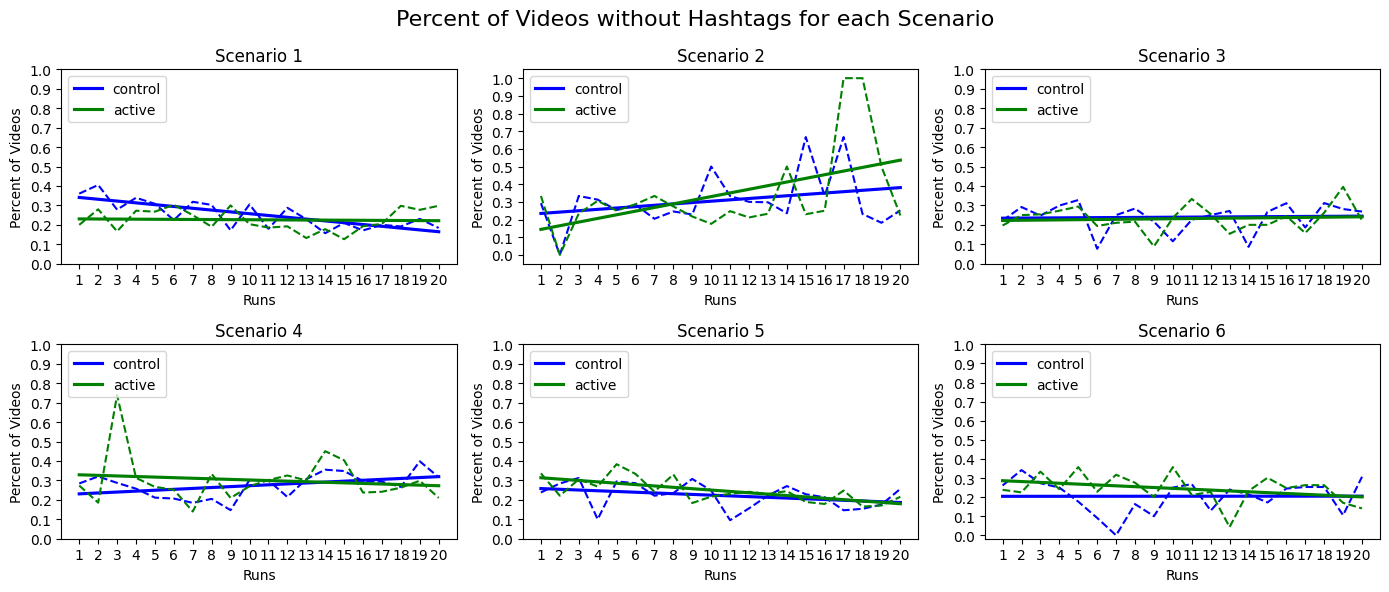

In [113]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

#control - blue
#active - green
#plot - dashed
#regplot - solid

ax1.plot(feed_summary(1)["run"], feed_summary(1)["%_videos_without_hash_control"], color='blue', linestyle='dashed')
sns.regplot(x="run", y="%_videos_without_hash_control", data = feed_summary(1), color = 'blue', label = "control", ci=None, scatter=None, ax=ax1)
ax1.plot(feed_summary(1)["run"], feed_summary(1)["%_videos_without_hash_active"], color='green', linestyle='dashed')
sns.regplot(x="run", y="%_videos_without_hash_active", data = feed_summary(1), color = 'green', label = "active", ci=None, scatter=None, ax=ax1)
ax1.legend(loc="upper left"); ax1.set_title("Scenario 1")
ax1.set_xticks(np.arange(1,21,1)); ax1.set_xlabel("Runs"); ax1.set_yticks(np.arange(0, 1.1, 0.1)); ax1.set_ylabel("Percent of Videos")

ax2.plot(feed_summary(2)["run"], feed_summary(2)["%_videos_without_hash_control"], color='blue', linestyle='dashed')
sns.regplot(x="run", y="%_videos_without_hash_control", data = feed_summary(2), color = 'blue', label = "control", ci=None, scatter=None, ax=ax2)
ax2.plot(feed_summary(2)["run"], feed_summary(2)["%_videos_without_hash_active"], color='green', linestyle='dashed')
sns.regplot(x="run", y="%_videos_without_hash_active", data = feed_summary(2), color = 'green', label = "active", ci=None, scatter=None, ax=ax2)
ax2.legend(loc="upper left"); ax2.set_title("Scenario 2")
ax2.set_xticks(np.arange(1,21,1)); ax2.set_xlabel("Runs"); ax2.set_yticks(np.arange(0, 1.1, 0.1)); ax2.set_ylabel("Percent of Videos")

ax3.plot(feed_summary(3)["run"], feed_summary(3)["%_videos_without_hash_control"], color='blue', linestyle='dashed')
sns.regplot(x="run", y="%_videos_without_hash_control", data = feed_summary(3), color = 'blue', label = "control", ci=None, scatter=None, ax=ax3)
ax3.plot(feed_summary(3)["run"], feed_summary(3)["%_videos_without_hash_active"], color='green', linestyle='dashed')
sns.regplot(x="run", y="%_videos_without_hash_active", data = feed_summary(3), color = 'green', label = "active", ci=None, scatter=None, ax=ax3)
ax3.legend(loc="upper left"); ax3.set_title("Scenario 3")
ax3.set_xticks(np.arange(1,21,1)); ax3.set_xlabel("Runs"); ax3.set_yticks(np.arange(0, 1.1, 0.1)); ax3.set_ylabel("Percent of Videos")

ax4.plot(feed_summary(4)["run"], feed_summary(4)["%_videos_without_hash_control"], color='blue', linestyle='dashed')
sns.regplot(x="run", y="%_videos_without_hash_control", data = feed_summary(4), color = 'blue', label = "control", ci=None, scatter=None, ax=ax4)
ax4.plot(feed_summary(4)["run"], feed_summary(4)["%_videos_without_hash_active"], color='green', linestyle='dashed')
sns.regplot(x="run", y="%_videos_without_hash_active", data = feed_summary(4), color = 'green', label = "active", ci=None, scatter=None, ax=ax4)
ax4.legend(loc="upper left"); ax4.set_title("Scenario 4")
ax4.set_xticks(np.arange(1,21,1)); ax4.set_xlabel("Runs"); ax4.set_yticks(np.arange(0, 1.1, 0.1)); ax4.set_ylabel("Percent of Videos")

ax5.plot(feed_summary(5)["run"], feed_summary(5)["%_videos_without_hash_control"], color='blue', linestyle='dashed')
sns.regplot(x="run", y="%_videos_without_hash_control", data = feed_summary(5), color = 'blue', label = "control", ci=None, scatter=None, ax=ax5)
ax5.plot(feed_summary(5)["run"], feed_summary(5)["%_videos_without_hash_active"], color='green', linestyle='dashed')
sns.regplot(x="run", y="%_videos_without_hash_active", data = feed_summary(5), color = 'green', label = "active", ci=None, scatter=None, ax=ax5)
ax5.legend(loc="upper left"); ax5.set_title("Scenario 5")
ax5.set_xticks(np.arange(1,21,1)); ax5.set_xlabel("Runs"); ax5.set_yticks(np.arange(0, 1.1, 0.1)); ax5.set_ylabel("Percent of Videos")

ax6.plot(feed_summary(6)["run"], feed_summary(6)["%_videos_without_hash_control"], color='blue', linestyle='dashed')
sns.regplot(x="run", y="%_videos_without_hash_control", data = feed_summary(6), color = 'blue', label = "control", ci=None, scatter=None, ax=ax6)
ax6.plot(feed_summary(6)["run"], feed_summary(6)["%_videos_without_hash_active"], color='green', linestyle='dashed')
sns.regplot(x="run", y="%_videos_without_hash_active", data = feed_summary(6), color = 'green', label = "active", ci=None, scatter=None, ax=ax6)
ax6.legend(loc="upper left"); ax6.set_title("Scenario 6")
ax6.set_xticks(np.arange(1,21,1)); ax6.set_xlabel("Runs"); ax6.set_yticks(np.arange(0, 1.1, 0.1)); ax6.set_ylabel("Percent of Videos")

plt.suptitle("Percent of Videos without Hashtags for each Scenario", size=16)
plt.tight_layout()
plt.show()

##### 3.3.1.2 Plot B: Similarity of Hashtags, Creator, and Music (via Jaccard Index)

In [115]:
figb, axesb = plt.subplots(nrows=2, ncols=3, figsize=(14, 6))
ax1, ax2, ax3, ax4, ax5, ax6 = axesb.flatten()

#hashtag - red
#creator - azure
#music - purple

ax1.plot(feed_summary(1)["run"], feed_summary(1)["jaccard_hash"], color='red', linestyle='dashed')
sns.regplot(x="run", y="jaccard_hash", data = feed_summary(1), color = 'red', label = "hashtag", ci=None, scatter=None, ax=ax1)
ax1.plot(feed_summary(1)["run"], feed_summary(1)["jaccard_author"], color='azure', linestyle='dashed')
sns.regplot(x="run", y="jaccard_author", data = feed_summary(1), color = 'azure', label = "creator", ci=None, scatter=None, ax=ax1)
ax1.plot(feed_summary(1)["run"], feed_summary(1)["jaccard_music"], color='purple', linestyle='dashed')
sns.regplot(x="run", y="jaccard_music", data = feed_summary(1), color = 'purple', label = "music", ci=None, scatter=None, ax=ax1)
ax1.legend(loc="upper left"); ax1.set_title("Scenario 1")
ax1.set_xticks(np.arange(1,21,1)); ax1.set_xlabel("Runs"); ax1.set_yticks(np.arange(0, 1.1, 0.1)); ax1.set_ylabel("Jaccard Index")

ax2.plot(feed_summary(2)["run"], feed_summary(2)["jaccard_hash"], color='red', linestyle='dashed')
sns.regplot(x="run", y="jaccard_hash", data = feed_summary(2), color = 'red', label = "hashtag", ci=None, scatter=None, ax=ax2)
ax2.plot(feed_summary(2)["run"], feed_summary(2)["jaccard_author"], color='azure', linestyle='dashed')
sns.regplot(x="run", y="jaccard_author", data = feed_summary(2), color = 'azure', label = "creator", ci=None, scatter=None, ax=ax2)
ax2.plot(feed_summary(2)["run"], feed_summary(2)["jaccard_music"], color='purple', linestyle='dashed')
sns.regplot(x="run", y="jaccard_music", data = feed_summary(2), color = 'purple', label = "music", ci=None, scatter=None, ax=ax2)
ax2.legend(loc="upper left"); ax2.set_title("Scenario 2")
ax2.set_xticks(np.arange(1,21,1)); ax2.set_xlabel("Runs"); ax2.set_yticks(np.arange(0, 1.1, 0.1)); ax2.set_ylabel("Jaccard Index")

ax3.plot(feed_summary(3)["run"], feed_summary(3)["jaccard_hash"], color='red', linestyle='dashed')
sns.regplot(x="run", y="jaccard_hash", data = feed_summary(3), color = 'red', label = "hashtag", ci=None, scatter=None, ax=ax3)
ax3.plot(feed_summary(3)["run"], feed_summary(3)["jaccard_author"], color='azure', linestyle='dashed')
sns.regplot(x="run", y="jaccard_author", data = feed_summary(3), color = 'azure', label = "creator", ci=None, scatter=None, ax=ax3)
ax3.plot(feed_summary(3)["run"], feed_summary(3)["jaccard_music"], color='purple', linestyle='dashed')
sns.regplot(x="run", y="jaccard_music", data = feed_summary(3), color = 'purple', label = "music", ci=None, scatter=None, ax=ax3)
ax3.legend(loc="upper left"); ax3.set_title("Scenario 3")
ax3.set_xticks(np.arange(1,21,1)); ax3.set_xlabel("Runs"); ax3.set_yticks(np.arange(0, 1.1, 0.1)); ax3.set_ylabel("Jaccard Index")

ax4.plot(feed_summary(4)["run"], feed_summary(4)["jaccard_hash"], color='red', linestyle='dashed')
sns.regplot(x="run", y="jaccard_hash", data = feed_summary(4), color = 'red', label = "hashtag", ci=None, scatter=None, ax=ax4)
ax4.plot(feed_summary(4)["run"], feed_summary(4)["jaccard_author"], color='azure', linestyle='dashed')
sns.regplot(x="run", y="jaccard_author", data = feed_summary(4), color = 'azure', label = "creator", ci=None, scatter=None, ax=ax4)
ax4.plot(feed_summary(4)["run"], feed_summary(4)["jaccard_music"], color='purple', linestyle='dashed')
sns.regplot(x="run", y="jaccard_music", data = feed_summary(4), color = 'purple', label = "music", ci=None, scatter=None, ax=ax4)
ax4.legend(loc="upper left"); ax4.set_title("Scenario 4")
ax4.set_xticks(np.arange(1,21,1)); ax4.set_xlabel("Runs"); ax4.set_yticks(np.arange(0, 1.1, 0.1)); ax4.set_ylabel("Jaccard Index")

ax5.plot(feed_summary(5)["run"], feed_summary(5)["jaccard_hash"], color='red', linestyle='dashed')
sns.regplot(x="run", y="jaccard_hash", data = feed_summary(5), color = 'red', label = "hashtag", ci=None, scatter=None, ax=ax5)
ax5.plot(feed_summary(5)["run"], feed_summary(5)["jaccard_author"], color='azure', linestyle='dashed')
sns.regplot(x="run", y="jaccard_author", data = feed_summary(5), color = 'azure', label = "creator", ci=None, scatter=None, ax=ax5)
ax5.plot(feed_summary(5)["run"], feed_summary(5)["jaccard_music"], color='purple', linestyle='dashed')
sns.regplot(x="run", y="jaccard_music", data = feed_summary(5), color = 'purple', label = "music", ci=None, scatter=None, ax=ax5)
ax5.legend(loc="upper left"); ax5.set_title("Scenario 5")
ax5.set_xticks(np.arange(1,21,1)); ax5.set_xlabel("Runs"); ax5.set_yticks(np.arange(0, 1.1, 0.1)); ax5.set_ylabel("Jaccard Index")

ax6.plot(feed_summary(6)["run"], feed_summary(6)["jaccard_hash"], color='red', linestyle='dashed')
sns.regplot(x="run", y="jaccard_hash", data = feed_summary(6), color = 'red', label = "hashtag", ci=None, scatter=None, ax=ax6)
ax6.plot(feed_summary(6)["run"], feed_summary(6)["jaccard_author"], color='azure', linestyle='dashed')
sns.regplot(x="run", y="jaccard_author", data = feed_summary(6), color = 'azure', label = "creator", ci=None, scatter=None, ax=ax6)
ax6.plot(feed_summary(6)["run"], feed_summary(6)["jaccard_music"], color='purple', linestyle='dashed')
sns.regplot(x="run", y="jaccard_music", data = feed_summary(6), color = 'purple', label = "music", ci=None, scatter=None, ax=ax6)
ax6.legend(loc="upper left"); ax6.set_title("Scenario 6")
ax6.set_xticks(np.arange(1,21,1)); ax6.set_xlabel("Runs"); ax6.set_yticks(np.arange(0, 1.1, 0.1)); ax6.set_ylabel("Jaccard Index")

plt.suptitle("Jaccard Index for Hashtag, Creator, and Music Similarities", size=16)
plt.tight_layout()
plt.show()

delete below

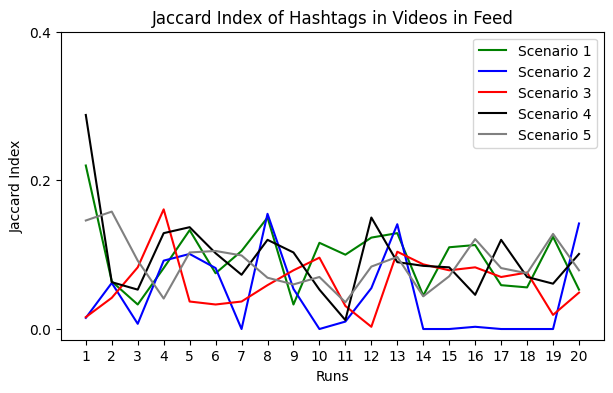

In [53]:
figb, axb = plt.subplots(figsize=(7,4))
plt.plot(feed_summary(1)["run"], feed_summary(1)["jaccard_hash"], color='green', label="Scenario 1")
plt.plot(feed_summary(2)["run"], feed_summary(2)["jaccard_hash"], color='blue', label="Scenario 2")
plt.plot(feed_summary(3)["run"], feed_summary(3)["jaccard_hash"], color='red', label="Scenario 3")
plt.plot(feed_summary(4)["run"], feed_summary(4)["jaccard_hash"], color='black', label="Scenario 4")
plt.plot(feed_summary(5)["run"], feed_summary(5)["jaccard_hash"], color='gray', label="Scenario 5")
plt.plot(feed_summary(6)["run"], feed_summary(6)["jaccard_hash"], color='pink', label="Scenario 6")

axb.set_title('Jaccard Index of Hashtags in Videos in Feed')
axb.legend(loc='upper right')
axb.set_xlabel('Runs'); axb.set_ylabel('Jaccard Index')

plt.yticks(np.arange(0, 0.6,0.2)) #usually range is 0 to 1
plt.xticks(np.arange(1,21,1))
plt.show()

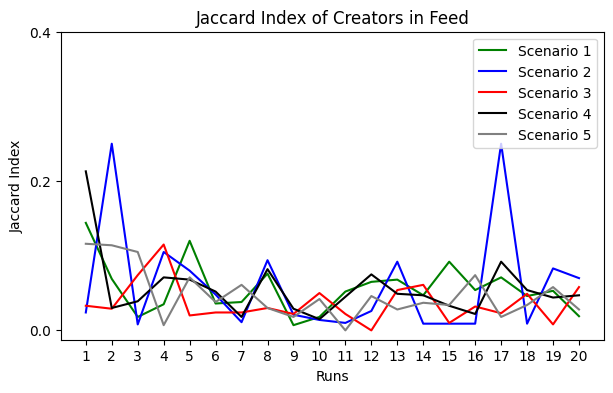

In [60]:
figc, axc = plt.subplots(figsize=(7,4))
plt.plot(feed_summary(1)["run"], feed_summary(1)["jaccard_author"], color='green', label="Scenario 1")
plt.plot(feed_summary(2)["run"], feed_summary(2)["jaccard_author"], color='blue', label="Scenario 2")
plt.plot(feed_summary(3)["run"], feed_summary(3)["jaccard_author"], color='red', label="Scenario 3")
plt.plot(feed_summary(4)["run"], feed_summary(4)["jaccard_author"], color='black', label="Scenario 4")
plt.plot(feed_summary(5)["run"], feed_summary(5)["jaccard_author"], color='gray', label="Scenario 5")
plt.plot(feed_summary(6)["run"], feed_summary(6)["jaccard_author"], color='pink', label="Scenario 6")

axc.set_title('Jaccard Index of Creators in Feed')
axc.legend(loc='upper right')
axc.set_xlabel('Runs'); axc.set_ylabel('Jaccard Index')

plt.yticks(np.arange(0, 0.6,0.2)) #usually range is 0 to 1
plt.xticks(np.arange(1,21,1))
plt.show()

## 3.4 Hashtag Comparison (predefined vs active feed and liked)
Note: only concerning the active user's account and the predefined hashtags that they were supposed to like

In [34]:
# predefined hashtags to like for each user (scenario)
sc1_predef = ["gaming", "fortnite", "videogames", "pcgaming", "epicgames", "gamergirl", "leaguetok", "gamingmemes", "gamelancer", "league", "overwatch", "tiktokgaming", "xbox", "zelda", "switch", "godOfWar", "genshin", "gaminggenshin", "ps5", "ghostrecon", "arcade", "gameontiktok"]
sc2_predef = ["5minutecrafts", "crafts", "handmade", "creative", "crafty", "decoration", "tutorial", "gifts", "aesthetic," "decor", "diy", "pompoms", "craft", "doityourself", "making", "creativity", "tiktokcrafts", "craftsupplies", "craftshow", "craftspirits", "craftsy", "craftsmanship", "craftsforkids", "craftsforadults", "craftsforteenagers", "string", "cardboard", "diycraft", "design", "art"]
sc3_predef = ["foodlover", "foodie", "foodtiktok", "eatingsounds", "cooking", "eating", "yummy", "delicious", "mukbang", "eat", "recipe", "tiktokfood", "chicken", "fries", "foodietiktok", "foodvideo", "foodreview", "streetfood", "eatingvideo", "ramen", "foodvideos", "foodtok", "foodchallenge", "burger", "eatingshow", "eatingasmr", "baking", "food", "homemadecooking", "homemade"]
sc4_predef = ["makeuptutorial", "makeup", "beauty", "makeupartist", "makeuphacks", "tutorial", "eyeliner", "makeuptransformation", "grwn", "mua", "skincare", "makeuproutine", "makeupchallenge","getreadywithme", "beautytutorial", "foundation", "concealer", "elf", "sephora", "cosmetics", "beautyblender", "lipstick", "glossier"]
sc5_predef = ["workout", "fitness", "gym", "lifter", "gymtok", "fitnessmotivation", "running", "bodybuilding", "fit", "fittok", "health", "weightloss", "muscle", "training", "fitnesstips", "legday", "lighting", "weights", "weight", "proteinpowder", "protein", "proteindrink", "fitnessmotivation", "exercise", "glutegrowth", "squats", "armday", "gains", "lululemon", "fitnessoutfit", "healthylifestyle", "fitnessjourney"]
sc6_predef = ["dance", "dancer", "music", "dancechallenge", "dancetutorial", "dancers", "lyric", "song", "spotify", "applemusic", "hiphop", "dancing", "party", "dj", "choreography", "dancelife", "love", "fun", "trend", "tapdance", "jazz", "singer", "guitarplayer", "musicismylife", "concert", "musiclover", "classicalmusic", "musicianlifestyle", "musiciansoftoday", "taylorswift"]

In [108]:
def predef_div(scenario_num):
    jaccard_feed = []; jaccard_liked = []
    for run_num in range(1,21):
        if scenario_num==1:
            predef_set = sc1_predef
            feed_set = sc1_active_all[sc1_active_all.run==run_num]
            liked_set = sc1_active_liked[sc1_active_liked.run==run_num] 
        elif scenario_num==2:
            predef_set = sc2_predef
            feed_set = sc2_active_all[sc2_active_all.run==run_num]
            liked_set = sc2_active_liked[sc2_active_liked.run==run_num] 
        elif scenario_num==3:
            predef_set = sc3_predef
            feed_set = sc3_active_all[sc3_active_all.run==run_num]
            liked_set = sc3_active_liked[sc3_active_liked.run==run_num] 
        elif scenario_num==4:
            predef_set = sc4_predef
            feed_set = sc4_active_all[sc4_active_all.run==run_num]
            liked_set = sc4_active_liked[sc4_active_liked.run==run_num] 
        elif scenario_num==5:
            predef_set = sc5_predef
            feed_set = sc5_active_all[sc5_active_all.run==run_num]
            liked_set = sc5_active_liked[sc5_active_liked.run==run_num] 
        elif scenario_num==6:
            predef_set = sc6_predef
            feed_set = sc6_active_all[sc6_active_all.run==run_num]
            liked_set = sc6_active_liked[sc6_active_liked.run==run_num] 
        jaccard_feed.append(jaccard_similarity(set(predef_set), set(clean_hashtags(feed_set)[0])))
        jaccard_liked.append(jaccard_similarity(set(predef_set), set(clean_hashtags(liked_set)[0])))
    return jaccard_feed, jaccard_liked

def predef_summary(scenario_num):
    hash_data=[]
    for run_num in range(1,21):
        run_data = [run_num, predef_div(scenario_num)[0][run_num-1], predef_div(scenario_num)[1][run_num-1]]
        hash_data.append(run_data)
    return pd.DataFrame(hash_data, columns=['run', 'jaccard_predef_vs_feed', 'jaccard_predef_vs_liked'])

#print(predef_summary(5))


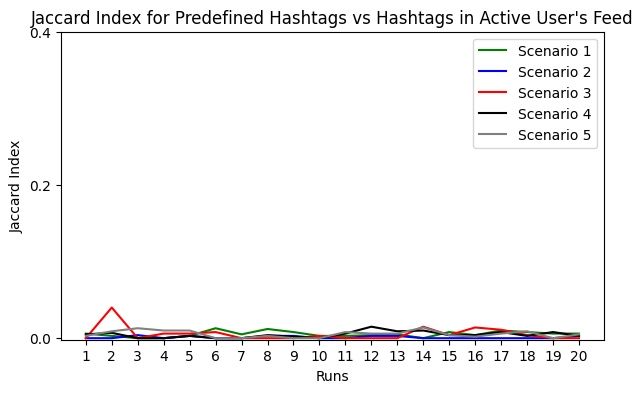

In [59]:
# plot similarities
fig, ax = plt.subplots(figsize=(7,4))

plt.plot(predef_summary(1)["run"], predef_summary(1)["jaccard_predef_vs_feed"], color='green', label="Scenario 1")
plt.plot(predef_summary(2)["run"], predef_summary(2)["jaccard_predef_vs_feed"], color='blue', label="Scenario 2")
plt.plot(predef_summary(3)["run"], predef_summary(3)["jaccard_predef_vs_feed"], color='red', label="Scenario 3")
plt.plot(predef_summary(4)["run"], predef_summary(4)["jaccard_predef_vs_feed"], color='black', label="Scenario 4")
plt.plot(predef_summary(5)["run"], predef_summary(5)["jaccard_predef_vs_feed"], color='gray', label="Scenario 5")
plt.plot(predef_summary(6)["run"], predef_summary(6)["jaccard_predef_vs_feed"], color='pink', label="Scenario 6")

ax.set_title("Jaccard Index for Predefined Hashtags vs Hashtags in Active User's Feed")
ax.legend(loc='upper right')
ax.set_xlabel('Runs')
ax.set_ylabel('Jaccard Index')

plt.yticks(np.arange(0, 0.6,0.2)) #usually range is 0 to 1
plt.xticks(np.arange(1,21,1))
plt.show()

TODO: do the same plot as above but for predef vs liked

### 3.5 Development Post Metric (Likes, Shares, Comments, Views)
this section authored by audlia20 and carolinejjung

In [ ]:
#grouping data by runs to find averages
avg_sc1_active_all = sc1_active_all.groupby('run')[['likes', 'comments', 'shares', 'saves']].mean().reset_index()
avg_sc1_control_all = sc1_control_all.groupby('run')[['likes', 'comments', 'shares', 'saves']].mean().reset_index()
avg_sc2_active_all = sc2_active_all.groupby('run')[['likes', 'comments', 'shares', 'saves']].mean().reset_index()
avg_sc2_control_all = sc2_control_all.groupby('run')[['likes', 'comments', 'shares', 'saves']].mean().reset_index()
avg_sc3_active_all = sc3_active_all.groupby('run')[['likes', 'comments', 'shares', 'saves']].mean().reset_index()
avg_sc3_control_all = sc3_control_all.groupby('run')[['likes', 'comments', 'shares', 'saves']].mean().reset_index()
avg_sc4_active_all = sc4_active_all.groupby('run')[['likes', 'comments', 'shares', 'saves']].mean().reset_index()
avg_sc4_control_all = sc4_control_all.groupby('run')[['likes', 'comments', 'shares', 'saves']].mean().reset_index()
avg_sc5_active_all = sc5_active_all.groupby('run')[['likes', 'comments', 'shares', 'saves']].mean().reset_index()
avg_sc5_control_all = sc5_control_all.groupby('run')[['likes', 'comments', 'shares', 'saves']].mean().reset_index()
#avg_sc6_active_all = sc6_active_all.groupby('run')[['likes', 'comments', 'shares', 'saves']].mean().reset_index()
#avg_sc6_control_all = sc6_control_all.groupby('run')[['likes', 'comments', 'shares', 'saves']].mean().reset_index()